In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from math import isnan
from collections import defaultdict

In [4]:
titanic_data=pd.read_csv('titanic_data.csv')

**Starting with possible questions that can be answered using the databse:**
1. Is there a relation between people of different classes that survived?
2. Looking at different age groups, what percentages survived?
3. For people who came alone and those with families, did the survival stats differ?
4. How does the males to death ratio differ from females to death ratio?
5. Did passenger fare in any way relate to the survival rate of the passengers.
6. Which city suffered the most fatalities? And which had the highest survivors?

In [5]:
#Revised, as suggested. For descriptive labels.
titanic_data['Survival'] = titanic_data.Survived.map({0 : 'Died', 1 : 'Survived'})

In [6]:
#Descriptive column label for Pclass
titanic_data['Class'] = titanic_data.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

In [7]:
#Descriptive column label for Embarked
titanic_data['Ports'] = titanic_data.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,Third Class,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,Third Class,Southampton


## Missing Values

In [9]:
#Revision: Checking for the missing values as suggested
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survival       891 non-null object
Class          891 non-null object
Ports          889 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


We notice that the following are missing from out data: 
1. 177 'Age' values
2. 687 'Cabin' values
3. 2 'Embarked'/'Ports' values

The missing 'Age' values may form a limitation to the analysis to be performed cause they are missing in a significant number i.e. 177, roughly about 20% of the total number of values being missed.  We'll further see on how to handle them when we are exploring the vaiable.

Next, the cabin details are not available for about 75% passengers. This is enough reason not to explore the variable. Furthermore, even if we had all the cabin values, there doesn't seem much scope for exploration of the variable considering the cabin details would provide us with any information of the passengers chance of surviving or dying. It could have indirectly been influencing the chances of survival considering that there were different *types of cabins* alloted to *different ticket classes*. But lack of information in regard with the variable limits us on exploring the same. 

The two missing port values shouldn't make much of a difference while exploring the variable. 2 out of 891 makes only 0.0022% of the values thus we can choose to ignore these values. 

## At the start we look at the general survival rate.

In [10]:
survive=titanic_data['Survival'].value_counts()

In [11]:
survive

Died        549
Survived    342
Name: Survival, dtype: int64

In [12]:
survive=survive/titanic_data['Survival'].count()

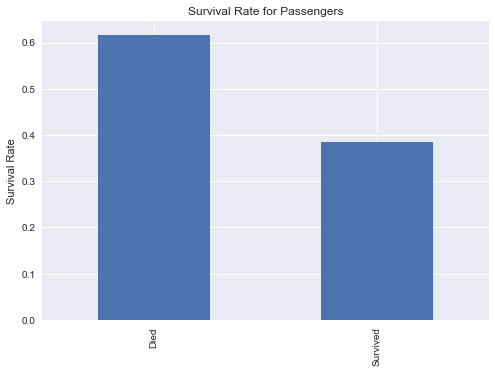

In [20]:
survive.plot('bar',title='Survival Rate for Passengers').set_ylabel('Survival Rate')

**We notice that of the total passengers whose information lies with us, only about 37% survived.** 
*We start to look at the factors that may be responsible for this:*

## First, we consider the Pclass column.


Steps:
1. Group people according to 'Pclass'.
2. Find mean for 'Survived' for the groups.
3. Plot the results.

In [21]:
titanic_class_groups = titanic_data.groupby('Class')

In [22]:
print('Count:\n{}\n\nNumber of people survived:\n{}'.format(titanic_class_groups.count()['PassengerId'],titanic_class_groups.sum()['Survived']))

Count:
Class
First Class     216
Second Class    184
Third Class     491
Name: PassengerId, dtype: int64

Number of people survived:
Class
First Class     136
Second Class     87
Third Class     119
Name: Survived, dtype: int64


In [23]:
titanic_class_groups['Survived'].mean()

Class
First Class     0.629630
Second Class    0.472826
Third Class     0.242363
Name: Survived, dtype: float64

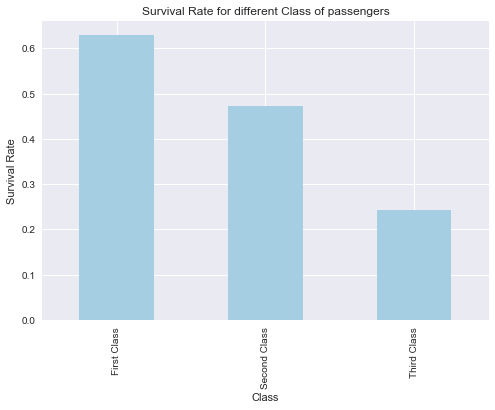

In [24]:
titanic_class_groups['Survived'].mean().plot(kind='bar', colormap='Paired',title='Survival Rate for different Class of passengers').set_ylabel('Survival Rate')


*Thus we see a clear difference between people of different classes and their survival rate.*
More than 63% of **first** class passengers survived while only about 24% of **third** class did.

This clearly shows how the socio-economic status made a difference. The riceher survived while the ones who were comparitively poor suffered.


## Next, we move on to age groups.

Look into what number of people fall into what age groups. Later, find out the count for how many of those survived.

**Handling Missing Values: **There's two ways in which this can be done: 
1. Ignoring the missing values
2. Taking the mean of the given values, as values for the missing places

Just to get a clear flow of ideas, let's do both. 

In [25]:
titanic_data.Age.fillna(titanic_data.Age.mean())[128]

29.69911764705882

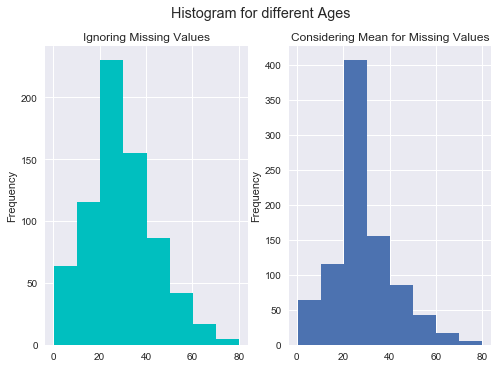

In [26]:
fig,hist=plt.subplots(1,2)
fig.suptitle('Histogram for different Ages')
titanic_data.Age[titanic_data.Age.notnull()].plot(title='Ignoring Missing Values',kind='hist',bins=8,color='c',ax=hist[0])
titanic_data.Age.fillna(titanic_data.Age.mean()).plot(kind='hist',bins=8,ax=hist[1],title='Considering Mean for Missing Values')


In [27]:
print('Minimum Value for Age: ',titanic_data.Age.min())
print('Maximum Value for Age: ',titanic_data.Age.max())

Minimum Value for Age:  0.42
Maximum Value for Age:  80.0


#### Histogram for actual values : 
Here we see that maximum passengers lie in the range of 20-30, followed by 30-40 and 10-20.

*Next, we divide these passengers into age-groups of 10 and see the proportion of people surviving in each age group.*

#### Histogram with missing values as mean:
With mean at around 29.7, the count for range 20-30 goes up while the remaning heights remain intact i.e. the remaining shape is preserved.

In [28]:
age_survived_means=titanic_data.groupby(pd.cut(titanic_data['Age'],np.arange(0,90,10))).mean()['Survived']


In [29]:
age_survived_means_2=titanic_data.groupby(pd.cut(titanic_data.Age.fillna(titanic_data.Age.mean()),np.arange(0,90,10))).mean()['Survived']


In [30]:
age_survived_means

Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64

In [31]:
age_survived_means_2

Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64

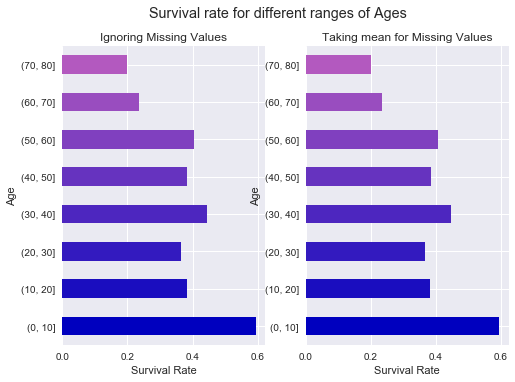

In [32]:
fig, a_s=plt.subplots(1,2)
fig.suptitle('Survival rate for different ranges of Ages')
age_survived_means.plot(kind='barh',color=[(x/10.0, x/20.0, 0.75) for x in range(len(age_survived_means))],title='Ignoring Missing Values',ax=a_s[0]).set_xlabel('Survival Rate')
age_survived_means.plot(kind='barh',color=[(x/10.0, x/20.0, 0.75) for x in range(len(age_survived_means))],title='Taking mean for Missing Values',ax=a_s[1]).set_xlabel('Survival Rate')

Their isn't much difference in the two graphs. The only difference that had to be and does exist is in the (20,30] bar. But, there also the difference is negligible.

**We can noticed in the graphs that above that Children between the ages of zero and ten had a surviving percentage of about 60%. People in the age group of 10 to 60 lie somewhere around 40% And lastly, the old age people (the ones above 60), survival percentage was about 20%.**

*It can also be inferred that dependent Children were protected by people, while the one in higher age group may have given up easily or rather wanted the younger ones to be saved before them.*


Lastly, we should always keep in mind while interpreting these plots that about 20% values were missing in the data. Even though taking an average for age doesnt give 

## Next, we look into the sex to survivor ratio

**We do this by taking two plots:**

*1. Number of people of each sex*
*2. Proportion from each sex that survived*

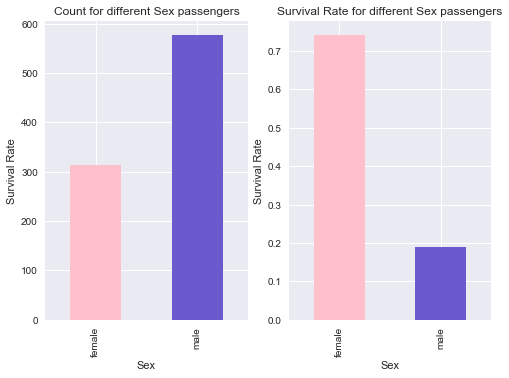

In [34]:
fig, axs = plt.subplots(1,2)
titanic_data.groupby('Sex').count()['PassengerId'].plot(kind='bar', color=['pink','slateblue'],ax=axs[0],title='Count for different Sex passengers').set_ylabel('Survival Rate')
titanic_data.groupby('Sex').mean()['Survived'].plot(kind='bar', color=['pink','slateblue'],ax=axs[1],title='Survival Rate for different Sex passengers').set_ylabel('Survival Rate')

*So, we see that information available with us has some more than 300 female passengers and a little less than 600 male passengers.*

*Of these, more than 70% females survived the collision and sinking while less than mere 20% males survived. External factors maybe resposible for this, for example men might have attempted to save their families and wives first. In general, women and children might have been led to safety first followed by men. *

## Now, we look at Port of Embarkation

Although, this shouldn't make much of difference, but worth analysing.

Note: There's two values missing of the 891 total passengers whose data rests with us. We choose to ignore these values while performing any analysis on the variable.

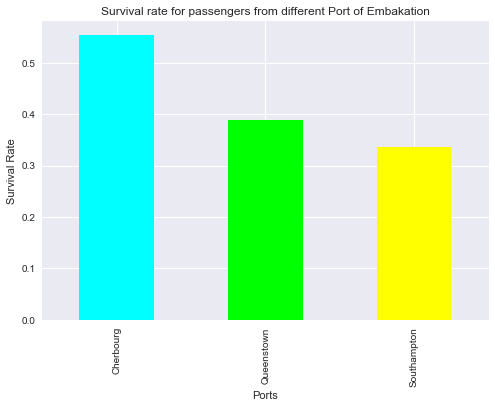

In [35]:
titanic_data.groupby('Ports').mean()['Survived'].plot(kind='bar', color=['cyan','lime','yellow'], title='Survival rate for passengers from different Port of Embakation').set_ylabel('Survival Rate')

**From the graph above we see that survivors for Cherbourg are about 55%, for Queenstown are about 40% and Southampton are about 33%. The figures although show variation but it is highly unlikely that the station of Embarkation made any difference. Other factors like people from different station with different classes or their sex might have made a difference here. **

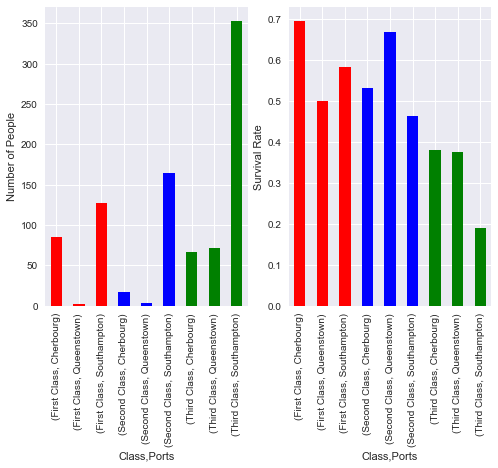

In [45]:
fig, p = plt.subplots(1,2)
a=titanic_data.groupby(['Class','Ports']).count()['PassengerId'].plot('bar',color=['r','r','r','b','b','b','g','g','g'],ax=p[0])
a.set_ylabel('Number of People')
b=titanic_data.groupby(['Class','Ports']).mean()['Survived'].plot(kind='bar',color=['r','r','r','b','b','b','g','g','g'],ax=p[1])
b.set_ylabel('Survival Rate')

###### We can see that there is quiet some distribution in the number of people belonging to different classes from different ports. To get a more clear view of the same, let's see one port at a time.

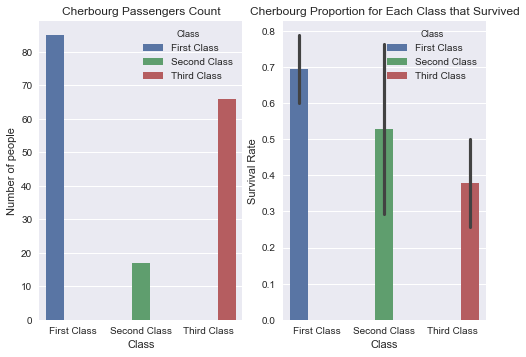

In [53]:
fig, cher= plt.subplots(nrows=1,ncols=2)
a=sns.countplot(x="Class", hue="Class", data=titanic_data[titanic_data.Embarked=='C'],ax=cher[0])

b=sns.barplot(x="Class", y="Survived", hue="Class", data=titanic_data[titanic_data.Embarked=='C'],ax=cher[1])
a.set(title='Cherbourg Passengers Count',ylabel='Number of people')
b.set(ylabel='Survival Rate',title='Cherbourg Proportion for Each Class that Survived')

**We notice that Cherbourg has higher 1st Class passengers thus its overall survival percentage should be high.**

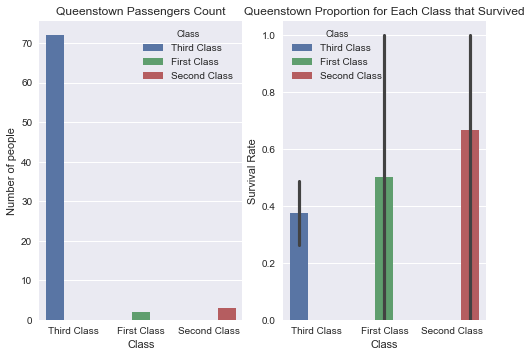

In [57]:
fig, queen= plt.subplots(1,2)
a=sns.countplot(x="Class", hue="Class", data=titanic_data[titanic_data.Embarked=='Q'],ax=queen[0])
a.set(title='Queenstown Passengers Count',ylabel='Number of people')
b=sns.barplot(x="Class", y="Survived", hue="Class", data=titanic_data[titanic_data.Embarked=='Q'],ax=queen[1])
b.set(title='Queenstown Proportion for Each Class that Survived',ylabel='Survival Rate')

**We notice here that Queenstown has a remarkably high number of third Class passengers when compared to its 2nd and 1st Class passengers. Thus, its survival rate should be low when compared to Cherbourg.**

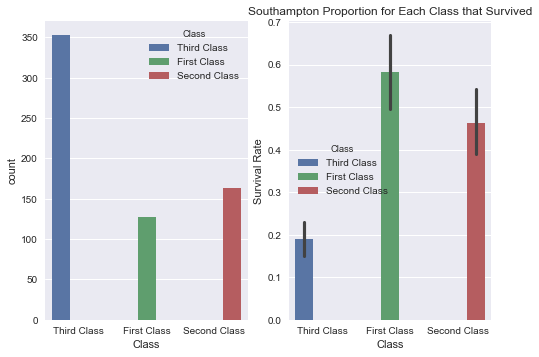

In [58]:
fig, south= plt.subplots(1,2)
a=sns.countplot(x="Class", hue="Class", data=titanic_data[titanic_data.Embarked=='S'],ax=south[0])
b.set(title='Southampton Passengers Count',ylabel='Number of people')

b=sns.barplot(x="Class", y="Survived", hue="Class", data=titanic_data[titanic_data.Embarked=='S'],ax=south[1])
b.set(ylabel='Survival Rate',title='Southampton Proportion for Each Class that Survived')

**We notice here that Southampton has a comparitively high number of third Class passengers when compared to its 2nd and 1st Class passengers. Thus, its survival rate should be low when compared to Cherbourg.**

### Next we start looking at the male-female proportion from each port.

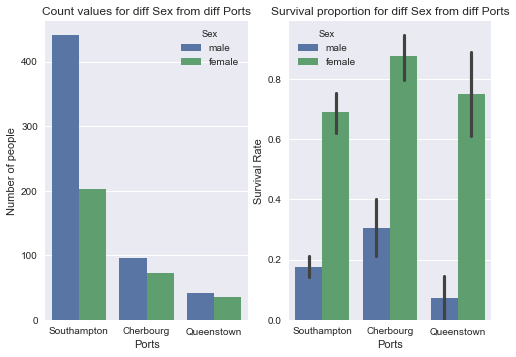

In [59]:
fig, sex_port=plt.subplots(1,2)
a=sns.countplot(x='Ports',hue='Sex',data=titanic_data, ax=sex_port[0])
a.set(ylabel='Number of people',title='Count values for diff Sex from diff Ports')
b=sns.barplot(x='Ports',y='Survived',hue='Sex',data=titanic_data,ax=sex_port[1])
b.set(ylabel='Survival Rate',title='Survival proportion for diff Sex from diff Ports')


**Here we notice that Southampton had high number of males when compared to its females, thus a low survival rate.**
**Cherbourg and Queesntown had about the same number, thus they would rather be influenced more by their class distributions.**

*From the plots above its rather simple to make out that there were high percentage of Male(when compared to female passengers) and 3rd Class passengers (when compared to first) from Southampton resulting into a lower survival ratio. *

*Also, high percentage of First Class passengers (comparing from 3rd and 2nd class)from Cherbourgh add to their higher survival rate. *

## Further, we move on to looking at the Fares

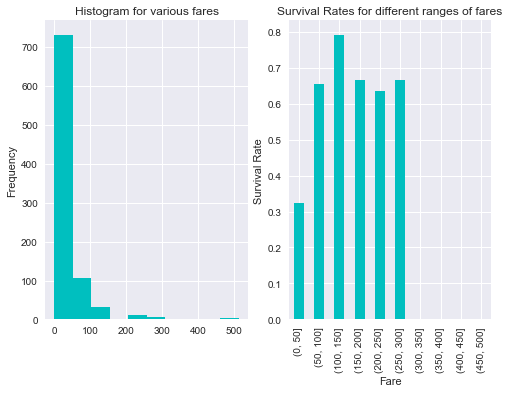

In [60]:
fig, far = plt.subplots(1,2)
titanic_data['Fare'].plot(kind='hist', ax=far[0],color='c',title='Histogram for various fares')
titanic_data.groupby(pd.cut(titanic_data['Fare'],np.arange(0,550,50))).mean()['Survived'].plot(kind='bar',ax=far[1],color='c',title='Survival Rates for different ranges of fares').set_ylabel('Survival Rate')


**From the graph on the above-left, we can see that mostly everyone fell in the 0-50 pound ticket category. The other graph states that of these only about 35% survived while in other categories the survival numbers are higher. But nothing much can be inferred from these graphs, because there aren't significant enough number above 50. **

In [62]:
def add_family_name(k):
    return k['Name'].split(',')[0]
    

In [63]:
titanic_data['Family_name']=titanic_data.apply(add_family_name,axis=1)

In [64]:
def family_members(x):
    return titanic_data['Family_name'].value_counts()[x]

In [65]:
titanic_data['Member_numbers']=titanic_data['Family_name'].apply(family_members)

In [66]:
titanic_family_groups=titanic_data.groupby('Member_numbers')

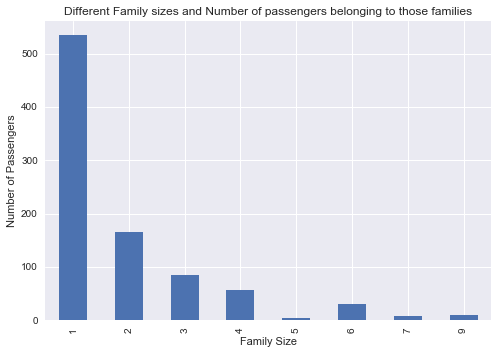

In [68]:
a=titanic_family_groups.count()['PassengerId'].plot(kind='bar',title='Different Family sizes and Number of passengers belonging to those families')
a.set(xlabel='Family Size',ylabel='Number of Passengers')

**But, we do not have details about every passenger. So grouping them this way doesnt make much sense. Also, not necessarily people with a common surname belong to a same family.**

Rather, try adding the sibling/Spouse number + Parents'/Children's number.

In [69]:
def find_total_family_members(k):
    return (k['SibSp'] + k['Parch'] + 1)
#We add 1 in order to count total members in the family, we add the person himself/herself.

In [70]:
titanic_data['total_family']=titanic_data.apply(find_total_family_members,axis='columns')

In [71]:
titanic_total_family_groups=titanic_data.groupby('total_family')

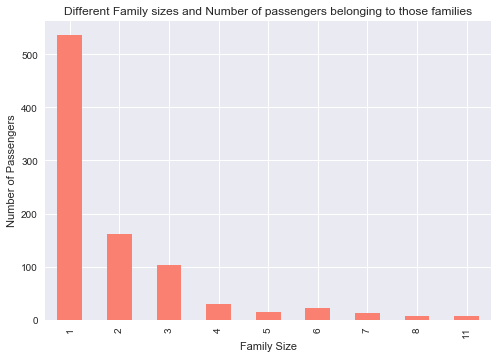

In [72]:
a=titanic_total_family_groups.count()['PassengerId'].plot(kind='bar',color='salmon',title='Different Family sizes and Number of passengers belonging to those families')
a.set(xlabel='Family Size',ylabel='Number of Passengers')

*Thus, there isn't much difference in the two graphs but, some values do seem to have variation. For eg: There were no values for 8 in the first one, but there are in the latter. Opposite is the case for 11.*



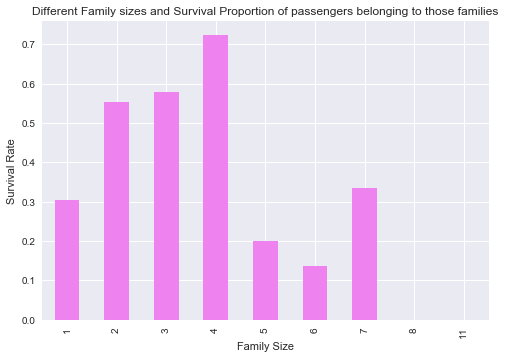

In [73]:
a=titanic_total_family_groups.mean()['Survived'].plot(kind='bar',color='violet',title='Different Family sizes and Survival Proportion of passengers belonging to those families')
a.set(xlabel='Family Size',ylabel='Survival Rate')

**We see that the members from the family of 8 and 11 (for those which we hold info about), none survived. 
Members from families of 5,6,7 survived comparitively in a lower proportion than those with small families of 2,3,4.**
It can be assumed that family members of bigger families tried to save every one in their families but failed to dp so and resulted in a higher death toll.
For small families, saving everyone in their families was comparitively easy because of a smaller number.
People who came as singles prove an exception in the graph here. Their survival rate was somewhere arround 33%.

# Conclusion:

### Factors: 
We saw different factors that affected directly or indirectly in the survival of passengers on Titanic. 

Some major factors were the *socio-economic status or ticket class* of the passengers and the *gender* of the passsengers.
Further, some minor factors were the *age* and *family size or number of siblings/parents/children* of the passengers.
Not much information was gained from the fares.

*Port of Embarkation* was a **spurious correlation** but serves as an indirect factor as different ports had different distribution of passengers in terms of ticket classes and gender.

### Limitations: 
The major limitations of the dataset comprise of the missing values. The missisng values for *Cabins* and *Port of Embarkation* although didn't create much of a restriction to our analysis, but that of *Age* definitely did. There were large number of missing values for age and thus we can not conclude much from its plots. Taking the mean value for missing values and ignoring the missing values completely did fetch us result but doesn't guarantee the authenticity of our findings. 117 values can make much difference. 

Apart from passengers, I felt it would be interesting to go through the staff data as well. Not just the captains, but the management staff including the ones that were working at restaurants , looking after the cabins etc. would provide an important insight. The dataset given only deals with passengers. 

### Note:
As we progressed with the analysis, It became quite clear that all the relations between the different factors and survial rate were merely correlations that do not in any way mean causation. There were first class passengers that died while  there were 3rd class passengers that survived. Similarly, not all women survived or not all men died.